# PROJECT: MARINE DRIVE BIO DIVERCITY MONITARING USING DEEP LEARNING



In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
data_dir = "/content/drive/MyDrive/fish_project_31/FishImgDataset"

train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")



# Dataset Overview: Cropped Images
This cell reads all .png files from the cropped dataset, extracts species names from filenames, and counts:

It ensures the dataset is properly structured before model training.

In [4]:
image_files = []
for root, dirs, files in os.walk(train_dir):
    for f in files:
        if f.lower().endswith((".png", ".jpg", ".jpeg")):
            image_files.append(os.path.join(root, f))

print(f"Total images in train folder: {len(image_files)}")


Total images in train folder: 8931


In [5]:
# Group by species name (folder name = class label)
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

species_count = defaultdict(int)

for filepath in image_files:
    species_name = os.path.basename(os.path.dirname(filepath))
    species_count[species_name] += 1

total_species = len(species_count)
total_images = sum(species_count.values())


print(f"Total species (based on folder names): {total_species}")
print(f"Total images: {total_images}")

Total species (based on folder names): 31
Total images: 8931


In [6]:
# Convert species_count dictionary to DataFrame
df_species = pd.DataFrame(list(species_count.items()), columns=["Species", "Image_Count"])
df_species = df_species.sort_values("Image_Count", ascending=False)

# Visualizing Species Distribution

This cell visualizes the top 20 fish species with the highest number of images using a horizontal bar plot:

Converts the species-count dictionary into a pandas DataFrame.

Sorts species by image count in descending order.

Plots a bar chart to show species imbalance or dominance.

Useful for:

Understanding dataset bias

Guiding augmentation strategies or sampling methods



/tmp/ipython-input-2371311469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_species.head(20), x="Image_Count", y="Species", palette="viridis")


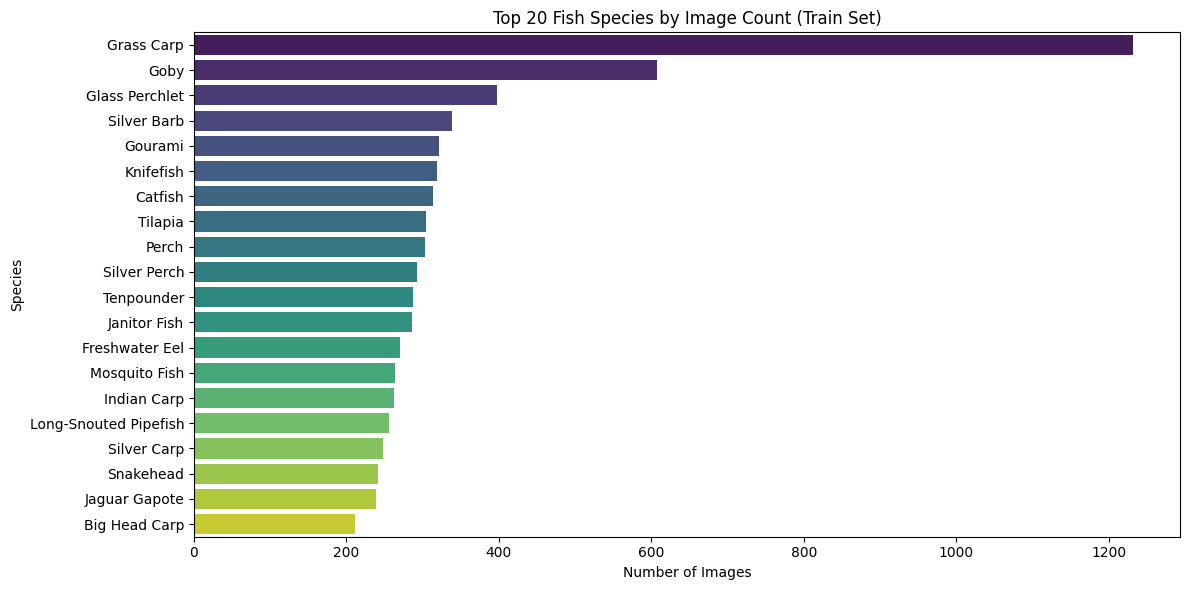

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_species.head(20), x="Image_Count", y="Species", palette="viridis")
plt.title("Top 20 Fish Species by Image Count (Train Set)")
plt.xlabel("Number of Images")
plt.ylabel("Species")
plt.tight_layout()
plt.show()

# Distribution of Image Count per Species

This histogram provides an overview of how many images are available per species:

Shows the distribution of species by their image count.

Helps identify underrepresented species (e.g., species with few samples).

Useful for decisions related to data balancing, augmentation, or class weighting in training.



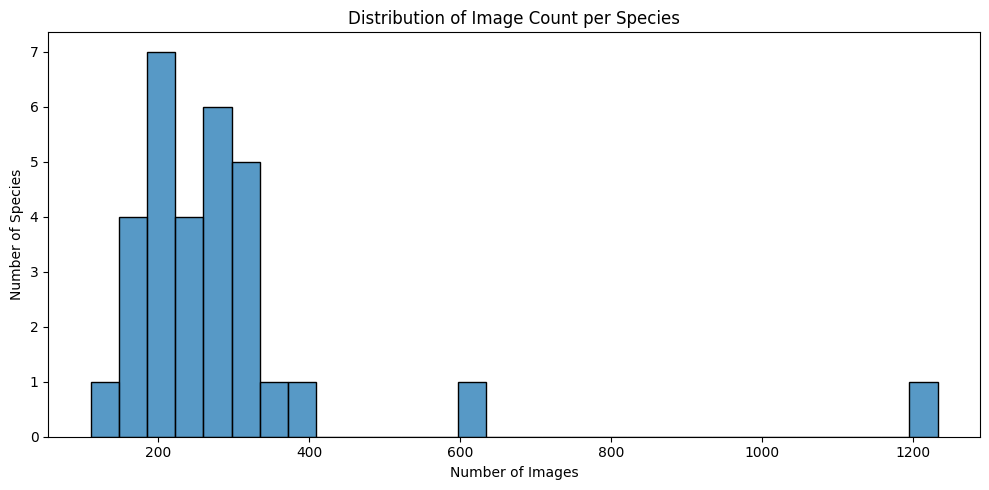

In [8]:
# Plot histogram of distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_species["Image_Count"], bins=30, kde=False)
plt.title("Distribution of Image Count per Species")
plt.xlabel("Number of Images")
plt.ylabel("Number of Species")
plt.tight_layout()
plt.show()

In [9]:
pd.set_option("display.max_rows", None)
print(df_species)

                  Species  Image_Count
11             Grass Carp         1232
8                    Goby          607
4          Glass Perchlet          397
25            Silver Barb          339
10                Gourami          321
17              Knifefish          319
1                 Catfish          314
30                Tilapia          304
23                  Perch          303
27           Silver Perch          293
29             Tenpounder          287
16           Janitor Fish          286
6          Freshwater Eel          271
19          Mosquito Fish          264
13            Indian Carp          262
18  Long-Snouted Pipefish          256
26            Silver Carp          248
28              Snakehead          242
15          Jaguar Gapote          239
0           Big Head Carp          211
9               Gold Fish          206
22              Pangasius          203
5      Black Spotted Barb          200
3    Fourfinger Threadfin          191
20                Mudfish

# Visual Inspection: Random Sample of Cropped Fish Images
This cell randomly displays 5 cropped fish images from the dataset:

Gives a qualitative sense of image clarity, diversity, and species appearance.

Useful to visually verify that preprocessing (like cropping) was successful.

Image titles display the species name parsed from the filename.



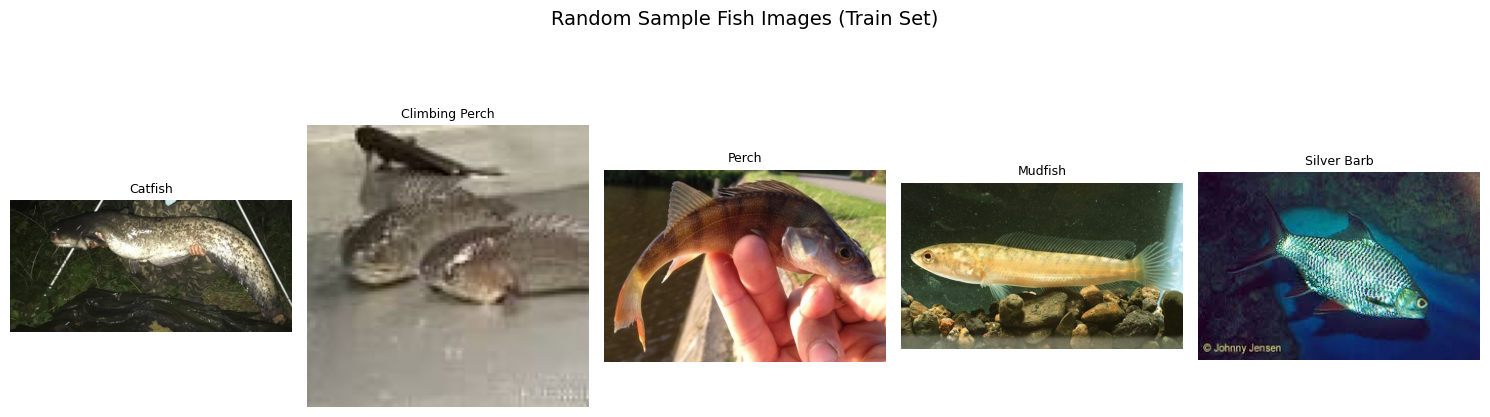

In [10]:
import random
from collections import defaultdict
from PIL import Image
import csv

sample_files = random.sample(image_files, 5)

plt.figure(figsize=(15, 5))
for i, img_path in enumerate(sample_files):
    species_name = os.path.basename(os.path.dirname(img_path))
    img = Image.open(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(species_name, fontsize=9)
    plt.axis("off")

plt.suptitle("Random Sample Fish Images (Train Set)", fontsize=14)
plt.tight_layout()
plt.show()

# Creating Metadata CSV for Cropped Fish Images
This cell generates a metadata CSV file (cropped_metadata.csv) containing:

image_path: Full path to each image file.

label: Species name extracted from the filename (excluding the numeric suffix).

This metadata is useful for:

Building custom datasets for training, validation, or retrieval.

Tracking image-label pairs cleanly.

Streamlining future loading with pandas or PyTorch Dataset.

# Previewing Metadata CSV
We load the generated cropped_metadata.csv file using pandas and preview the first few rows to ensure correct formatting.
It contains two key columns:

- image_path: Full file path of each fish image

- label: Corresponding species name (used as the target label)

This will help us verify data integrity before proceeding to modeling or feature extraction.


In [11]:
output_csv = "/content/drive/MyDrive/fish_project_31/train_metadata.csv"
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["image_path", "label"])
    for img in image_files:
        label = os.path.basename(os.path.dirname(img))
        writer.writerow([img, label])

print(f"Metadata CSV created: {output_csv}")

df_meta = pd.read_csv(output_csv)
print(df_meta.head())

Metadata CSV created: /content/drive/MyDrive/fish_project_31/train_metadata.csv
                                          image_path          label
0  /content/drive/MyDrive/fish_project_31/FishImg...  Big Head Carp
1  /content/drive/MyDrive/fish_project_31/FishImg...  Big Head Carp
2  /content/drive/MyDrive/fish_project_31/FishImg...  Big Head Carp
3  /content/drive/MyDrive/fish_project_31/FishImg...  Big Head Carp
4  /content/drive/MyDrive/fish_project_31/FishImg...  Big Head Carp


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
num_classes = 31
batch_size = 32
epochs = 20
lr = 1e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image Transformations for Model Training
We apply preprocessing transformations to the fish images to make them compatible with deep learning models:

- Resizing: All images are resized to 224×224 pixels — standard input size for pretrained models.

- Normalization: Pixel values are normalized using the ImageNet mean and std, matching the pretraining conditions of transfer learning models.

- Data Augmentation (Training only): RandomHorizontalFlip() helps improve generalization by introducing mirrored image variants.

Separate pipelines are used for:

- train_transforms → includes augmentation.

- val_transforms → no augmentation for accurate evaluation.

In [14]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_ds = datasets.ImageFolder(train_dir, transform=transform)
val_ds   = datasets.ImageFolder(val_dir, transform=transform)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=False)

class_names = train_ds.classes
print("✅ Loaded dataset")
print(f"Train: {len(train_ds)} | Val: {len(val_ds)} | Classes: {len(class_names)}")

✅ Loaded dataset
Train: 8933 | Val: 2801 | Classes: 31


# EfficientNet B0

In [15]:
model = models.efficientnet_b0(pretrained=True)
in_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#  Model Training

This section trains a Efficientnet-B0 model for fish species classification. The final classification layer is modified to match the number of unique species in the dataset. We use cross-entropy loss and the Adam optimizer, and train the model for 15 epochs.

Key steps:

Load Ffficientnet-B0 with pretrained weights.

Replace the final linear layer to adapt to our number of species.

Use GPU if available.

Train the model with train_loader and evaluate using val_loader each epoch.

Save the best model based on validation accuracy.

Training statistics such as loss and accuracy are printed after each epoch for monitoring progress. The best model (based on validation accuracy) is saved to disk as "best_model.pth".



In [16]:
best_acc = 0.0
save_path = "/content/drive/MyDrive/fish_project_31/best_model_efficientnet.pth"

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    model.train()
    running_loss, running_correct = 0.0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_correct += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_ds)
    epoch_acc = running_correct.double() / len(train_ds)

    # Validation
    model.eval()
    val_loss, val_correct = 0.0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

            val_loss += loss.item() * inputs.size(0)
            val_correct += torch.sum(preds == labels.data)

    val_loss /= len(val_ds)
    val_acc = val_correct.double() / len(val_ds)

    print(f"Train Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")

    # Save the best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"✅ Best model saved at epoch {epoch+1} with val_acc {val_acc:.4f}")

print("\n🎉 Training finished!")
print(f"Best model saved at {save_path}")


Epoch 1/20


KeyboardInterrupt: 

In [16]:
import json
from torchvision import datasets, transforms

train_dir = "/content/drive/MyDrive/fish_project_31/FishImgDataset/train"

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

train_ds = datasets.ImageFolder(train_dir, transform=transform)
class_names = train_ds.classes

# Save label mapping
label_mapping = {cls_name: idx for idx, cls_name in enumerate(class_names)}
out_path = "/content/drive/MyDrive/fish_project_31/label_mapping.json"
with open(out_path, "w") as f:
    json.dump(label_mapping, f)

print(f"✅ Saved {len(class_names)} classes to {out_path}")


✅ Saved 31 classes to /content/drive/MyDrive/fish_project_31/label_mapping.json


In [17]:
# 2_model_loader_helpers.py
import torch
from collections import OrderedDict

def load_state(path, map_location="cpu"):
    """
    Loads a checkpoint file and returns a state_dict suitable for load_state_dict.
    Supports:
      - pure state_dict saved with torch.save(model.state_dict())
      - checkpoint dict containing 'model_state_dict' or 'state_dict'
    """
    ckpt = torch.load(path, map_location=map_location)
    # if checkpoint wraps state_dict
    if isinstance(ckpt, dict) and ('model_state_dict' in ckpt or 'state_dict' in ckpt):
        state = ckpt.get('model_state_dict', ckpt.get('state_dict'))
    else:
        state = ckpt

    # if saved using DataParallel -> keys start with 'module.'
    if any(k.startswith('module.') for k in state.keys()):
        new_state = OrderedDict()
        for k, v in state.items():
            new_state[k.replace('module.', '')] = v
        state = new_state

    return state

def safe_load_model(model, path, device):
    state = load_state(path, map_location=device)
    missing, unexpected = model.load_state_dict(state, strict=False)
    if missing:
        print("Missing keys when loading:", missing)
    if unexpected:
        print("Unexpected keys when loading:", unexpected)
    return model


In [18]:
# 3_compute_and_save_embeddings.py
import os
import numpy as np
from tqdm import tqdm
import torch, torch.nn as nn
from torchvision import datasets, transforms
from torchvision.models import efficientnet_b0

VAL_DIR = "/content/drive/MyDrive/fish_project_31/FishImgDataset/val"
MODEL_PATH = "/content/drive/MyDrive/fish_project_31/best_model_efficientnet.pth"
OUT_DIR = "/content/drive/MyDrive/fish_project_31/"
BATCH_SIZE = 32
IMG_SIZE = (224,224)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pre-saved embedding paths
emb_file   = os.path.join(OUT_DIR, "val_embeddings.npy")
label_file = os.path.join(OUT_DIR, "val_labels.npy")
path_file  = os.path.join(OUT_DIR, "val_image_paths.npy")

# -----------------------------
# If already computed, just load
# -----------------------------
if os.path.exists(emb_file) and os.path.exists(label_file) and os.path.exists(path_file):
    print("Embeddings already exist. Loading from disk...")
    embeddings = np.load(emb_file)
    labels = np.load(label_file)
    paths = np.load(path_file)
    print("Loaded:", embeddings.shape, labels.shape, paths.shape)

else:
    print("Computing embeddings...")

    val_transform = transforms.Compose([
        transforms.Resize(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
    ])

    val_ds = datasets.ImageFolder(VAL_DIR, transform=val_transform)
    val_loader = torch.utils.data.DataLoader(
        val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True
    )

    class_names = val_ds.classes
    print("Classes:", len(class_names))

    def safe_load_model(model, checkpoint_path, device):
        state_dict = torch.load(checkpoint_path, map_location=device)
        if "state_dict" in state_dict:
            state_dict = state_dict["state_dict"]

        new_state_dict = {}
        for k, v in state_dict.items():
            if k.startswith("module."):
                new_state_dict[k[len("module."):]] = v
            else:
                new_state_dict[k] = v
        model.load_state_dict(new_state_dict, strict=False)
        return model

    # Build feature extractor
    feat_model = efficientnet_b0(weights=None)
    feat_model.classifier[1] = nn.Linear(feat_model.classifier[1].in_features, len(class_names))
    feat_model = safe_load_model(feat_model, MODEL_PATH, DEVICE)
    feat_model.classifier = nn.Identity()  # remove final FC
    feat_model.to(DEVICE).eval()
    print("Built feature-extractor.")

    # Get ordered image paths from val_ds
    image_paths = [p for (p, _) in val_ds.samples]

    all_embeddings, all_labels = [], []

    with torch.no_grad():
        for images, labels_batch in tqdm(val_loader, desc="Embeddings"):
            images = images.to(DEVICE)
            feats = feat_model(images)
            feats = feats.reshape(feats.shape[0], -1).cpu().numpy()
            all_embeddings.append(feats)
            all_labels.extend(labels_batch.cpu().numpy())

    embeddings = np.vstack(all_embeddings)
    labels = np.array(all_labels)
    paths = np.array(image_paths)

    # Save to disk
    np.save(emb_file, embeddings)
    np.save(label_file, labels)
    np.save(path_file, paths)
    print("Saved embeddings/labels/paths to", OUT_DIR)


Embeddings already exist. Loading from disk...
Loaded: (2801, 1280) (2801,) (2801,)


In [19]:
# MODEL_PATH = "/content/drive/MyDrive/fish_project_31/best_model_efficientnet.pth"
LABELS_JSON = "/content/drive/MyDrive/fish_project_31/label_mapping.json"
EMB_NPY = "/content/drive/MyDrive/fish_project_31/val_embeddings.npy"
LABELS_NPY = "/content/drive/MyDrive/fish_project_31/val_labels.npy"
PATHS_NPY = "/content/drive/MyDrive/fish_project_31/val_image_paths.npy"

In [20]:
# load mapping
import json
with open(LABELS_JSON, "r") as f:
    label_mapping = json.load(f)
id_to_label = {int(v): k for k, v in label_mapping.items()}

In [21]:
# load model (classification)
from torchvision.models import efficientnet_b0
import torch.nn as nn
cls_model = efficientnet_b0(weights=None)
cls_model.classifier[1] = nn.Linear(cls_model.classifier[1].in_features, len(id_to_label))
cls_model.load_state_dict(torch.load(MODEL_PATH, map_location="cpu"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cls_model.to(device).eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [22]:
# prepare val loader (same transform as embeddings)
from torchvision import datasets, transforms
val_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
val_ds = datasets.ImageFolder(VAL_DIR, transform=val_transform)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=4)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# run predictions
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device)
        outputs = cls_model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.cpu().numpy())

y_true = np.array(y_true); y_pred = np.array(y_pred)

In [24]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=[id_to_label[i] for i in range(len(id_to_label))], digits=4))

Accuracy: 0.9950017850767583
                       precision    recall  f1-score   support

               Bangus     0.9811    1.0000    0.9905        52
        Big Head Carp     0.9844    1.0000    0.9921        63
   Black Spotted Barb     1.0000    1.0000    1.0000        63
              Catfish     1.0000    0.9794    0.9896        97
       Climbing Perch     1.0000    1.0000    1.0000        48
 Fourfinger Threadfin     0.9836    1.0000    0.9917        60
       Freshwater Eel     0.9895    1.0000    0.9947        94
       Glass Perchlet     1.0000    1.0000    1.0000       124
                 Goby     0.9947    1.0000    0.9974       189
            Gold Fish     1.0000    1.0000    1.0000        65
              Gourami     1.0000    1.0000    1.0000       100
           Grass Carp     0.9921    1.0000    0.9960       378
 Green Spotted Puffer     1.0000    1.0000    1.0000        34
          Indian Carp     1.0000    0.9877    0.9938        81
  Indo-Pacific Tarpon    

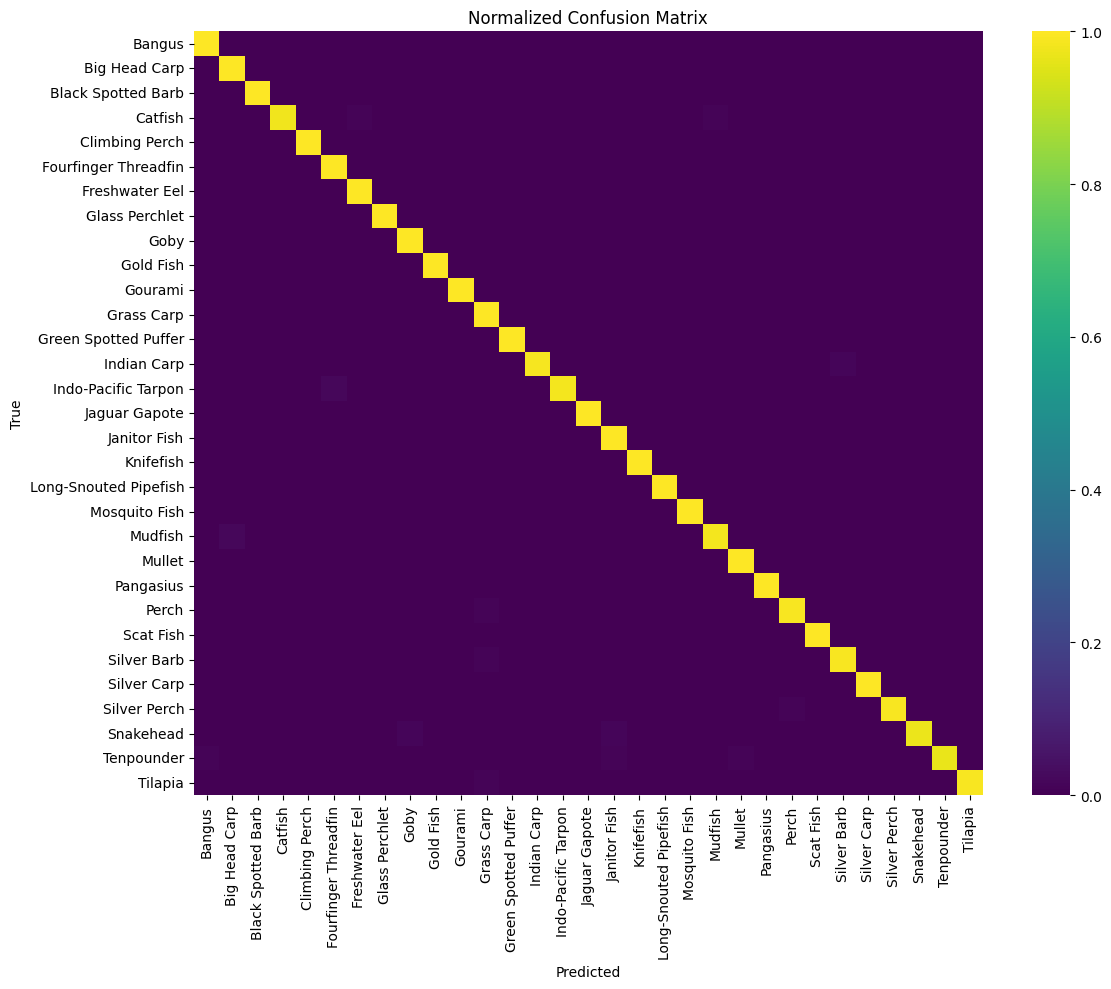

In [25]:
# confusion matrix (normalized per-row)
cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, None] + 1e-9)
plt.figure(figsize=(12,10))
import seaborn as sns
sns.heatmap(cm_norm, xticklabels=[id_to_label[i] for i in range(len(id_to_label))],
            yticklabels=[id_to_label[i] for i in range(len(id_to_label))],
            cmap="viridis", fmt=".2f")
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

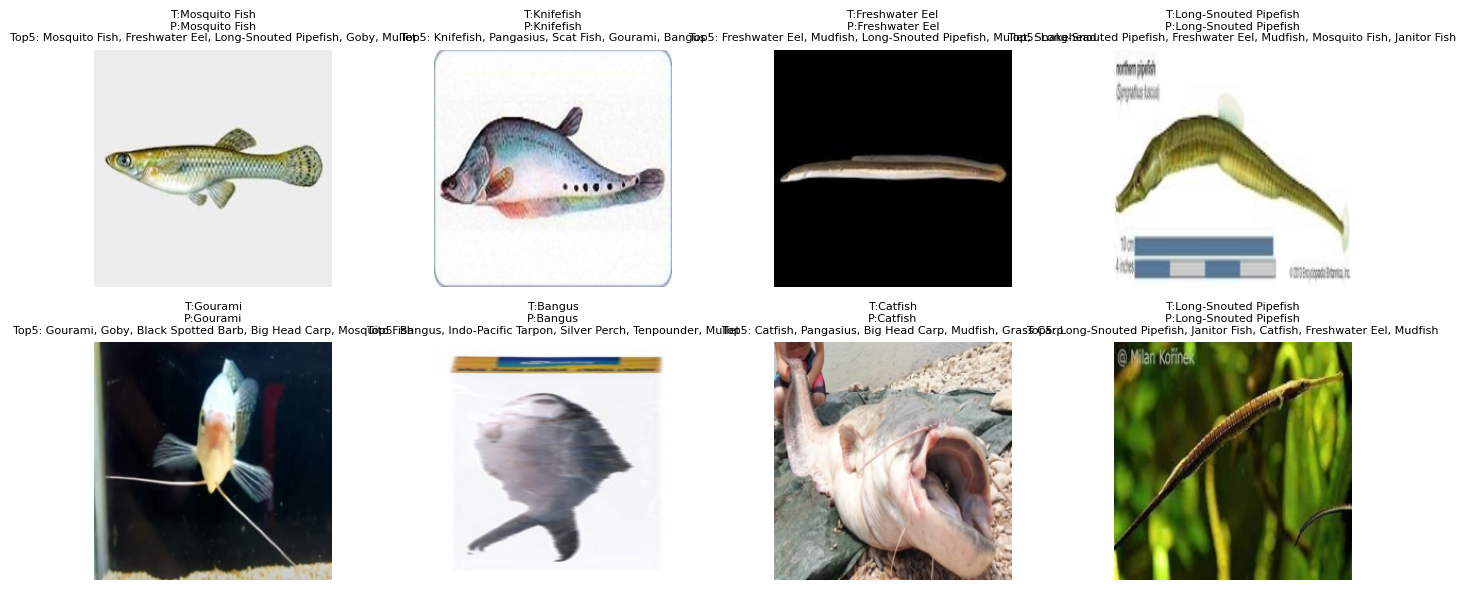

In [26]:
# Sanity-check: show some random val images with true / pred / top5
from torchvision.transforms.functional import normalize
import torch.nn.functional as F
INV_MEAN = [ -m/s for m,s in zip([0.485,0.456,0.406],[0.229,0.224,0.225]) ]
INV_STD = [ 1/s for s in [0.229,0.224,0.225] ]

def unnormalize(tensor):
    t = tensor.clone()
    for c in range(3):
        t[c] = t[c] * 0.229 + 0.485 if c==0 else t[c] * 0.224 + 0.456 if c==1 else t[c] * 0.225 + 0.406
    return t

def imshow_tensor(tensor):
    img = tensor.cpu().numpy().transpose(1,2,0)
    img = (img * np.array([0.229,0.224,0.225])) + np.array([0.485,0.456,0.406])
    img = np.clip(img, 0,1)
    plt.imshow(img); plt.axis('off')

# get top5 for each sample (optional)
# show 8 random examples
sample_idxs = random.sample(range(len(val_ds)), min(8, len(val_ds)))
plt.figure(figsize=(14,6))
for i, idx in enumerate(sample_idxs):
    img_t, label = val_ds[idx]
    with torch.no_grad():
        out = cls_model(img_t.unsqueeze(0).to(device))
        probs = F.softmax(out, dim=1).cpu().numpy()[0]
        top5_idx = probs.argsort()[::-1][:5]

    plt.subplot(2,4,i+1)
    imshow_tensor(img_t)
    title = f"T:{id_to_label[label]}\nP:{id_to_label[top5_idx[0]]}\nTop5: {', '.join([id_to_label[j] for j in top5_idx])}"
    plt.title(title, fontsize=8)
plt.tight_layout()
plt.show()

# Class Labels for First 20 Classes

In [27]:
import json

# Save index-to-class mapping
label_mapping = {cls_name: idx for idx, cls_name in enumerate(train_ds.classes)}
with open("/content/drive/MyDrive/fish_project_31/label_mapping.json", "w") as f:
    json.dump(label_mapping, f)

print("✅ Saved label mapping:", label_mapping)


✅ Saved label mapping: {'Bangus': 0, 'Big Head Carp': 1, 'Black Spotted Barb': 2, 'Catfish': 3, 'Climbing Perch': 4, 'Fourfinger Threadfin': 5, 'Freshwater Eel': 6, 'Glass Perchlet': 7, 'Goby': 8, 'Gold Fish': 9, 'Gourami': 10, 'Grass Carp': 11, 'Green Spotted Puffer': 12, 'Indian Carp': 13, 'Indo-Pacific Tarpon': 14, 'Jaguar Gapote': 15, 'Janitor Fish': 16, 'Knifefish': 17, 'Long-Snouted Pipefish': 18, 'Mosquito Fish': 19, 'Mudfish': 20, 'Mullet': 21, 'Pangasius': 22, 'Perch': 23, 'Scat Fish': 24, 'Silver Barb': 25, 'Silver Carp': 26, 'Silver Perch': 27, 'Snakehead': 28, 'Tenpounder': 29, 'Tilapia': 30}


In [28]:
%%writefile app.py
import streamlit as st
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from PIL import Image, UnidentifiedImageError
from torchvision import transforms
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
import json
from sklearn.metrics.pairwise import cosine_similarity
import os
from glob import glob

# ---------------- CONFIG ----------------
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMG_SIZE = (224, 224)

# Paths
DATA_DIR = "/content/drive/MyDrive/fish_project_31/FishImgDataset"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR = os.path.join(DATA_DIR, "val")
TEST_DIR = os.path.join(DATA_DIR, "test")

MODEL_PATH = "/content/drive/MyDrive/fish_project_31/best_model_efficientnet.pth"
LABELS_JSON = "/content/drive/MyDrive/fish_project_31/label_mapping.json"
EMB_PATH = "/content/drive/MyDrive/fish_project_31/val_embeddings.npy"
LAB_PATH = "/content/drive/MyDrive/fish_project_31/val_labels.npy"
PATHS_PATH = "/content/drive/MyDrive/fish_project_31/val_image_paths.npy"

# ---------------- STREAMLIT PAGE ----------------
st.set_page_config(page_title="🐟 Fish Species Identifier", page_icon="🐠", layout="wide")
st.title("🐠 AI-powered Fish Species Recognition")
st.sidebar.title("Info")
st.sidebar.write("Upload a fish image OR select from the test dataset.")
st.sidebar.write("Top-1/Top-5 predictions + Top-5 visually similar fish images.")

# ---------------- HELPERS ----------------
def find_existing_path(p):
    if os.path.exists(p): return p
    alt = p.replace("/content/drive/My Drive", "/content/drive/MyDrive")
    if os.path.exists(alt): return alt
    alt2 = p.replace("/content/drive/MyDrive", "/content/drive/My Drive")
    if os.path.exists(alt2): return alt2
    return None

@st.cache_data
def load_model_and_extractor():
    # load label mapping
    with open(LABELS_JSON, "r") as f:
        label_mapping = json.load(f)
    id_to_label = {int(v): k for k, v in label_mapping.items()}
    num_classes = len(label_mapping)

    # classification model
    cls_model = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
    cls_model.classifier[1] = nn.Linear(cls_model.classifier[1].in_features, num_classes)
    cls_model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE), strict=False)
    cls_model.eval().to(DEVICE)

    # feature extractor (remove classifier)
    feat_model = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
    feat_model.classifier[1] = nn.Linear(feat_model.classifier[1].in_features, num_classes)
    feat_model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE), strict=False)
    feat_model.classifier = nn.Identity()
    feat_model.eval().to(DEVICE)

    return cls_model, feat_model, id_to_label

@st.cache_data
def load_embeddings():
    emb = np.load(EMB_PATH)
    labels = np.load(LAB_PATH)
    paths = np.load(PATHS_PATH)
    return emb, labels, paths

transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

def get_topk(image, model, id_to_label, k=5):
    with torch.no_grad():
        t = transform(image).unsqueeze(0).to(DEVICE)
        out = model(t)
        probs = F.softmax(out, dim=1).cpu().numpy()[0]
        ids = probs.argsort()[::-1][:k]
        return [(id_to_label[int(i)], float(probs[i])) for i in ids]

def get_similar_images(query_img, feat_model, embeddings, image_paths, top_k=5):
    if embeddings.ndim > 2:
        embeddings = embeddings.reshape(embeddings.shape[0], -1)
    with torch.no_grad():
        t = transform(query_img).unsqueeze(0).to(DEVICE)
        q_feat = feat_model(t).cpu().numpy()
        if q_feat.ndim > 2:
            q_feat = q_feat.reshape(q_feat.shape[0], -1)
    sims = cosine_similarity(q_feat, embeddings)[0]
    top_indices = np.argsort(sims)[::-1][:top_k]
    return top_indices, sims[top_indices]

# ---------------- LOAD MODELS ----------------
try:
    cls_model, feat_model, id_to_label = load_model_and_extractor()
    embeddings, emb_labels, emb_paths = load_embeddings()
except Exception as e:
    st.error(f"Error loading model or embeddings: {e}")
    st.stop()

# ---------------- SELECT TEST DATA ----------------
test_images = glob(os.path.join(TEST_DIR, "*", "*"))  # <-- goes inside class folders

option = st.radio("Input method:", ["Upload image", "Select from test dataset"])
prediction_mode = st.sidebar.radio("Prediction Mode", ["Top-1", "Top-5"])

img = None
true_label = None

if option == "Select from test dataset":
    if len(test_images) == 0:
        st.warning("No test images found in the test folder!")
    else:
        # show image filenames, not directories
        selected_path = st.selectbox(
            "Pick an image:",
            test_images,
            format_func=lambda p: os.path.join(os.path.basename(os.path.dirname(p)), os.path.basename(p))  # species/img.jpg
        )
        img = Image.open(selected_path).convert("RGB")  # ✅ direct open, no need for find_existing_path
        true_label = os.path.basename(os.path.dirname(selected_path))  # species name

else:
    uploaded_file = st.file_uploader("Upload an image", type=["jpg","jpeg","png"])
    if uploaded_file:
        try:
            img = Image.open(uploaded_file).convert("RGB")
        except UnidentifiedImageError:
            st.error("Invalid image.")

# ---------------- PREDICTION & DISPLAY ----------------
if img is not None:
    col1, col2 = st.columns([1,1])
    with col1:
        st.image(img, caption=f"Selected Image{' — GT: ' + true_label if true_label else ''}", use_container_width=True)
        if prediction_mode == "Top-1":
            label, sc = get_topk(img, cls_model, id_to_label, k=1)[0]
            st.subheader("Top Prediction")
            st.write(f"{label} — {sc:.2%}")
        else:
            st.subheader("Top-5 Predictions")
            for lbl, sc in get_topk(img, cls_model, id_to_label, k=5):
                st.write(f"- {lbl} — {sc:.2%}")

    with col2:
        st.subheader("Top-5 visually similar images")
        top_idxs, scores = get_similar_images(img, feat_model, embeddings, emb_paths, top_k=5)
        sim_cols = st.columns(3)
        for i, (idx, sim) in enumerate(zip(top_idxs, scores)):
            c = sim_cols[i % 3]
            with c:
                candidate_path = str(emb_paths[idx])
                real_candidate = find_existing_path(candidate_path)
                similar_label_id = int(emb_labels[idx])
                similar_species = id_to_label.get(similar_label_id, f"ID {similar_label_id}")
                if real_candidate and os.path.exists(real_candidate):
                    st.image(real_candidate, caption=f"{similar_species} ({sim:.2%})", use_container_width=True)
                else:
                    st.write(f"{similar_species} — {sim:.2%}")

st.markdown("---")
st.markdown("Built with ❤ using Streamlit & PyTorch | Marine Biodiversity Research 🌊")


Overwriting app.py


In [29]:
!pip install streamlit pyngrok

In [45]:
!pip install streamlit pyngrok -q

In [31]:
from pyngrok import ngrok, conf
conf.get_default().auth_token = "30k0IpiQISKuQ6f6ilQYAPMOUdY_5CrCSe2LBuUSDVQ6zuqsP"

In [32]:
# Start tunnel
public_url = ngrok.connect(8501)
print("Streamlit App URL:", public_url)

# Run streamlit app
!streamlit run app.py --server.port 8501 &>/dev/null&

Streamlit App URL: NgrokTunnel: "https://b92f0507f6b0.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
from pyngrok import ngrok

# List all active tunnels
tunnels = ngrok.get_tunnels()
print(tunnels)

# Kill all tunnels
ngrok.kill()
print("All tunnels stopped. You can now start a new one.")


[]
All tunnels stopped. You can now start a new one.


In [78]:
# Download your model to local machine
from google.colab import files

# Copy model to Colab's local storage first
!cp "/content/drive/MyDrive/fish_project_31/best_model_efficientnet.pth" "/content/"

# Download to your computer
files.download('/content/best_model_efficientnet.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>